### Combined EDA for Chiacgo, Boston, Atlanta, and Denver ###

- For Frame of Reference:
| Year   |      Start of DST      |  End of DST |
|----------|:-------------:|------:|
| 2016 | March 13 | November 6 |
| 2017 | March 12 | November 5 |
| 2018 | March 11 | November 4 |
| 2019 | March 10 | November 3 |
| 2020 | March 8 | November 2 |

source: https://en.wikipedia.org/wiki/Main_Page

**Imports**

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import seaborn as sns
sns.set(style = "darkgrid")

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import datetime as dt

### Reading In Data ###

In [2]:
#original data:
chi_df_og = pd.read_csv('../data/chi_accidents.csv')
bos_df_og = pd.read_csv('../data/bos_accidents.csv')
atl_df_og = pd.read_csv('../data/atl_accidents.csv')
dia_df_og = pd.read_csv('../data/dia_accidents.csv')

In [3]:
#cleaned data:
chi_df = pd.read_csv('../data/chi_df_cleaned.csv')
bos_df = pd.read_csv('../data/bos_df_cleaned.csv')
atl_df = pd.read_csv('../data/atl_df_cleaned.csv')
dia_df = pd.read_csv('../data/dia_df_cleaned.csv')

In [4]:
chi_df.head(1)

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,start_time_ep,end_time_ep,weather_timestamp_ep,year,month,week,accident_duration,side_L,side_R,wind_direction_CALM,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_VAR,wind_direction_W,wind_direction_WNW,wind_direction_WSW,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Heavy Rain,weather_condition_Heavy Snow,weather_condition_Light Drizzle,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Snow,weather_condition_Thunder,weather_condition_Thunderstorms and Rain,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_condition_Light Snow with Thunder,weather_condition_Smoke / Windy,weather_condition_Light Snow and Sleet,weather_condition_Haze / Windy,weather_condition_Heavy Snow / Windy,weather_condition_Blowing Dust / Windy,weather_condition_Heavy Blowing Snow,is_DST
0,2,42.30596,-87.96015,42.306916,-87.960918,0.077,37.0,31.0,79.0,29.59,10.0,8.1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.480517e+09,1.480539e+09,1.480518e+09,2016,11,48,21600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
bos_df.head(1)

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,start_time_ep,end_time_ep,weather_timestamp_ep,year,month,week,accident_duration,side_L,side_R,wind_direction_CALM,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_VAR,wind_direction_W,wind_direction_WNW,wind_direction_WSW,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Heavy Rain,weather_condition_Heavy Snow,weather_condition_Light Drizzle,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow and Sleet,weather_condition_Mist,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Snow,weather_condition_Thunder,weather_condition_Thunderstorms and Rain,sunrise_sunset_Day,sunrise_sunset_Night,sunrise_sunset_nan,civil_twilight_Day,civil_twilight_Night,civil_twilight_nan,nautical_twilight_Day,nautical_twilight_Night,nautical_twilight_nan,astronomical_twilight_Day,astronomical_twilight_Night,astronomical_twilight_nan,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_condition_Light Snow with Thunder,weather_condition_Smoke / Windy,weather_condition_Light Thunderstorms and Snow,weather_condition_Haze / Windy,weather_condition_Freezing Rain,weather_condition_Heavy Snow / Windy,weather_condition_Blowing Dust / Windy,weather_condition_Heavy Blowing Snow,is_DST
0,2,41.87963,-71.37799,41.88518,-71.3785,0.384,46.9,46.9,97.0,30.01,10.0,9.2,0.02,0,0,0,0,1,0,0,0,0,0,0,0,0,1.480522e+09,1.480543e+09,1.480521e+09,2016,11,48,21600.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
atl_df.head(1)

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,start_time_ep,end_time_ep,weather_timestamp_ep,year,month,week,accident_duration,side_L,side_R,wind_direction_CALM,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_VAR,wind_direction_W,wind_direction_WNW,wind_direction_WSW,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Heavy Rain,weather_condition_Light Drizzle,weather_condition_Light Freezing Rain,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Mist,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Snow,weather_condition_Thunder,weather_condition_Thunderstorms and Rain,sunrise_sunset_Day,sunrise_sunset_Night,sunrise_sunset_nan,civil_twilight_Day,civil_twilight_Night,civil_twilight_nan,nautical_twilight_Day,nautical_twilight_Night,nautical_twilight_nan,astronomical_twilight_Day,astronomical_twilight_Night,astronomical_twilight_nan,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_condition_Light Snow with Thunder,weather_condition_Smoke / Windy,weather_condition_Light Thunderstorms and Snow,weather_condition_Light Snow and Sleet,weather_condition_Haze / Windy,weather_condition_Heavy Snow,weather_condition_Freezing Rain,weather_condition_Heavy Snow / Windy,weather_condition_Light Freezing Fog,weather_condition_Blowing Dust / Windy,weather_condition_Heavy Blowing Snow,weather_condition_Light Freezing Drizzle,is_DST
0,3,32.83752,-83.64864,32.840424,-83.646307,0.242,66.0,66.0,90.0,29.79,4.0,9.2,0.24,0,0,0,0,1,0,0,0,0,0,0,0,0,1.480527e+09,1.480549e+09,1.480528e+09,2016,11,48,21600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
dia_df.head(1)

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,start_time_ep,end_time_ep,weather_timestamp_ep,year,month,week,accident_duration,side_L,side_R,wind_direction_CALM,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_VAR,wind_direction_W,wind_direction_WNW,wind_direction_WSW,weather_condition_Blowing Dust / Windy,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Haze / Windy,weather_condition_Heavy Blowing Snow,weather_condition_Heavy Rain,weather_condition_Heavy Snow,weather_condition_Heavy Snow / Windy,weather_condition_Light Drizzle,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Rain,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow with Thunder,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Smoke / Windy,weather_condition_Snow,weather_condition_Thunder,weather_condition_Thunderstorms and Rain,sunrise_sunset_Day,sunrise_sunset_Night,sunrise_sunset_nan,civil_twilight_Day,civil_twilight_Night,civil_twilight_nan,nautical_twilight_Day,nautical_twilight_Night,nautical_twilight_nan,astronomical_twilight_Day,astronomical_twilight_Night,astronomical_twilight_nan,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_condition_Light Freezing Rain,weather_condition_Light Snow and Sleet,weather_condition_Freezing Rain,weather_condition_Light Rain Showers,weather_condition_Light Ice Pellets,is_DST
0,4,38.897,-104.74707,38.89705,-104.747869,0.043,37.9,32.7,18.0,29.94,10.0,6.9,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.480515e+09,1.480536e+09,1.480514e+09,2016,11,48,21600.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
print(chi_df.shape)
print(bos_df.shape)
print(atl_df.shape)
print(dia_df.shape)

(40973, 119)
(12178, 127)
(23630, 127)
(15382, 127)


In [9]:
chi_df.columns[:35]

Index(['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'distance(mi)', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop', 'sunrise_sunset',
       'civil_twilight', 'nautical_twilight', 'astronomical_twilight',
       'start_time_ep', 'end_time_ep', 'weather_timestamp_ep', 'year',
       'month'],
      dtype='object')

### EDA ###

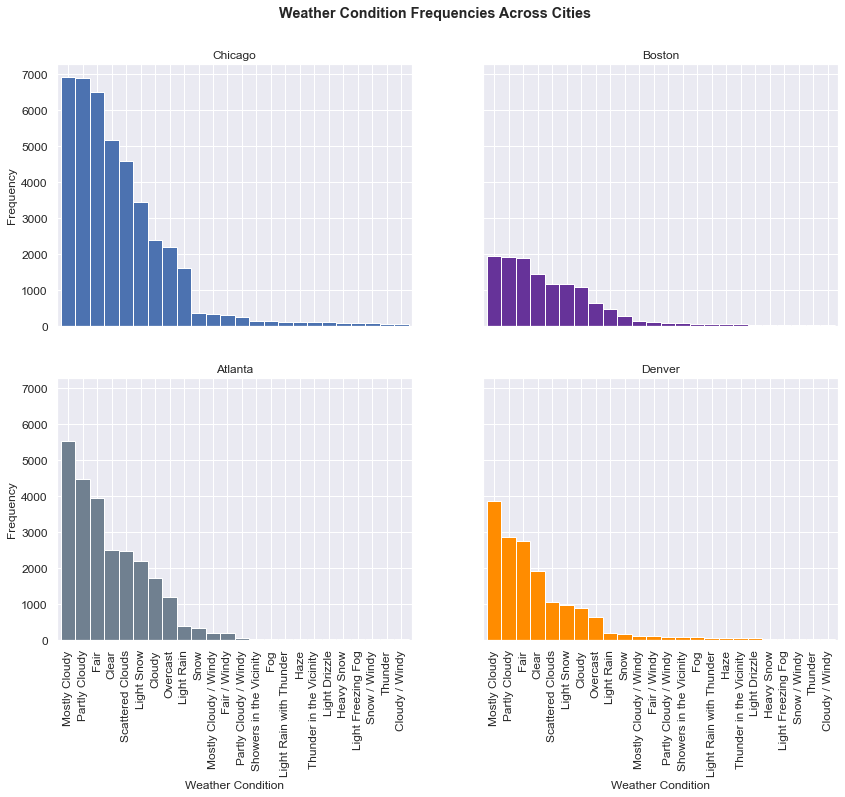

In [10]:
#https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot
#https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html
#https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib
#https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
#https://stackoverflow.com/questions/19626530/python-xticks-in-subplots
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

#bar plot of weather conditions for all cities

fig, axs = plt.subplots(figsize = (14, 10),
                        nrows = 2,
                        ncols = 2,
                        sharex = True,
                        sharey = True)

plt.subplots_adjust(left  = 0.125, right = 0.9,
                    bottom = 0.1, top = 0.9,
                    wspace = 0.2, hspace = 0.2)

for ax in axs.flat:
    ax.set(xlabel = 'Weather Condition', ylabel = 'Frequency')
    ax.tick_params(labelsize = 12)

chi_df_og['weather_condition'].value_counts()[:24].plot(ax = axs[0, 0], kind = 'bar',
                                                   width = 1,
                                                   title = 'Chicago')
bos_df_og['weather_condition'].value_counts()[:24].plot(ax = axs[0, 1], kind = 'bar',
                                                   width = 1,
                                                   color = 'rebeccapurple',
                                                   title = 'Boston')
atl_df_og['weather_condition'].value_counts()[:24].plot(ax = axs[1, 0], kind = 'bar',
                                                   width = 1,
                                                   color = 'slategrey',
                                                   title = 'Atlanta')
dia_df_og['weather_condition'].value_counts()[:24].plot(ax = axs[1, 1], kind = 'bar',
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Denver')

plt.suptitle('Weather Condition Frequencies Across Cities', fontweight = 'bold');

In [11]:
def simple_wind(dataframe):
    dataframe['wind_direction'].replace({'North': 'N',
                                        'South': 'S',
                                        'West' : 'W',
                                        'East' : 'E',
                                        'Calm' : 'CALM',
                                        'Variable': 'VAR'}, inplace = True)

In [12]:
simple_wind(chi_df_og)
simple_wind(bos_df_og)
simple_wind(atl_df_og)
simple_wind(dia_df_og)

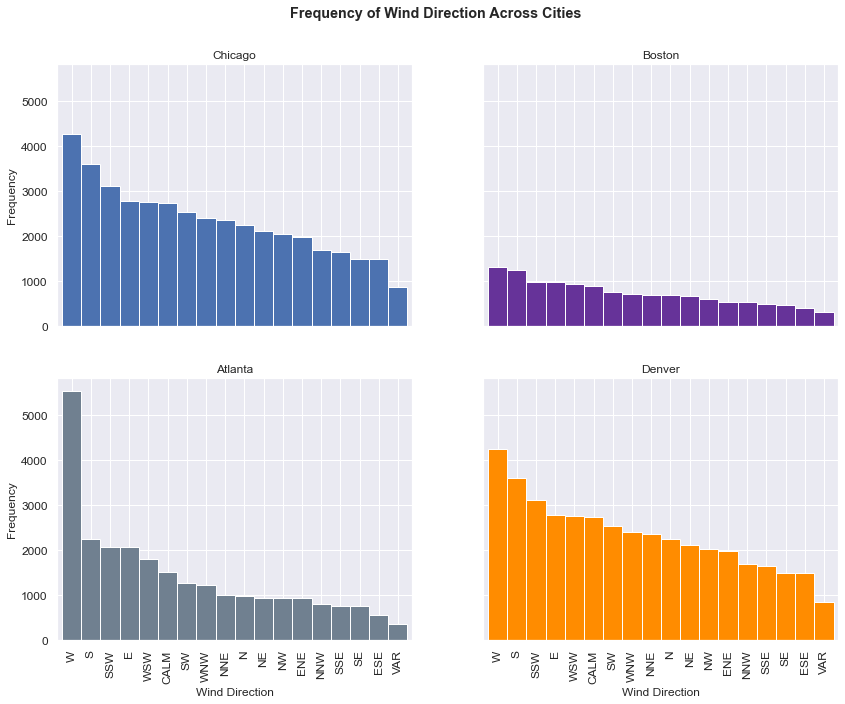

In [13]:
fig, axs = plt.subplots(figsize = (14, 10),
                        nrows = 2,
                        ncols = 2,
                        sharex = True,
                        sharey = True)

plt.subplots_adjust(left  = 0.125, right = 0.9,
                    bottom = 0.1, top = 0.9,
                    wspace = 0.2, hspace = 0.2)

for ax in axs.flat:
    ax.set(xlabel = 'Wind Direction', ylabel = 'Frequency')
    ax.tick_params(labelsize = 12)

chi_df_og['wind_direction'].value_counts()[:24].plot(ax = axs[0, 0], kind = 'bar',
                                                   width = 1,
                                                   title = 'Chicago')
bos_df_og['wind_direction'].value_counts()[:24].plot(ax = axs[0, 1], kind = 'bar',
                                                   width = 1,
                                                   color = 'rebeccapurple',
                                                   title = 'Boston')
atl_df_og['wind_direction'].value_counts()[:24].plot(ax = axs[1, 0], kind = 'bar',
                                                   width = 1,
                                                   color = 'slategrey',
                                                   title = 'Atlanta')
dia_df_og['wind_direction'].value_counts()[:24].plot(ax = axs[1, 1], kind = 'bar',
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Denver')

plt.suptitle('Frequency of Wind Direction Across Cities', fontweight = 'bold');

**Exploring Cleaned Data**

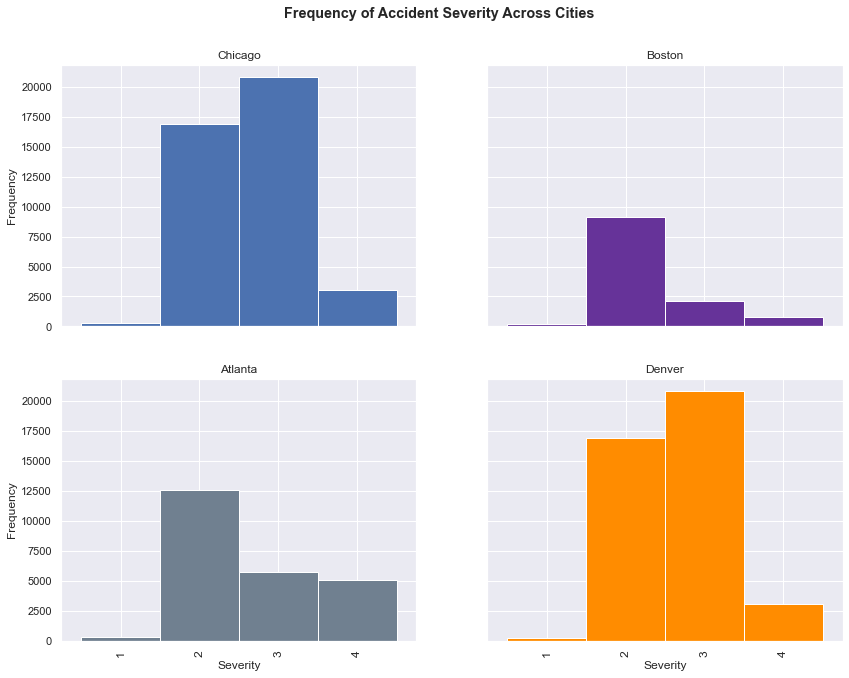

In [14]:
fig, axs = plt.subplots(figsize = (14, 10),
                        nrows = 2,
                        ncols = 2,
                        sharex = True,
                        sharey = True)

plt.subplots_adjust(left  = 0.125, right = 0.9,
                    bottom = 0.1, top = 0.9,
                    wspace = 0.2, hspace = 0.2)

for ax in axs.flat:
    ax.set(xlabel = 'Severity', ylabel = 'Frequency')
    ax.tick_params(axis = 'x', labelsize = 12)

chi_df['severity'].value_counts().sort_index().plot(ax = axs[0, 0], kind = 'bar',
                                                   width = 1,
                                                   title = 'Chicago')
bos_df['severity'].value_counts().sort_index().plot(ax = axs[0, 1], kind = 'bar',
                                                   width = 1,
                                                   color = 'rebeccapurple',
                                                   title = 'Boston')
atl_df['severity'].value_counts().sort_index().plot(ax = axs[1, 0], kind = 'bar',
                                                   width = 1,
                                                   color = 'slategrey',
                                                   title = 'Atlanta')
dia_df['severity'].value_counts().sort_index().plot(ax = axs[1, 1], kind = 'bar',
                                                   width = 1,
                                                   color = 'darkorange',
                                                   title = 'Denver')

plt.suptitle('Frequency of Accident Severity Across Cities', fontweight = 'bold');

In [11]:
#descriptive statistics for Chicago
chi_df[['severity', 'distance(mi)', 'temperature(f)', 'wind_chill(f)',
        'humidity(%)', 'pressure(in)','visibility(mi)', 'wind_speed(mph)',
        'precipitation(in)']].describe().drop('count').T

,mean,std,min,25%,50%,75%,max
severity,2.649159,0.622515,1.00,2.00,3.000,3.000,4.000
distance(mi),0.350881,0.842110,0.00,0.00,0.127,0.422,59.466
temperature(f),53.039663,21.232384,-22.40,36.50,53.100,71.100,168.800
wind_chill(f),49.929976,25.008669,-51.30,30.30,53.100,71.100,168.800
humidity(%),67.438414,18.474186,6.00,54.00,68.000,82.000,100.000
pressure(in),29.770252,0.438407,20.41,29.37,29.880,30.100,30.960
visibility(mi),8.889332,2.537214,0.00,10.00,10.000,10.000,20.000
wind_speed(mph),9.995604,4.829910,0.00,6.90,9.200,12.700,99.000
precipitation(in),0.005391,0.038249,0.00,0.00,0.000,0.000,1.950


In [16]:
#descriptive statistics for Chicago
bos_df[['severity', 'distance(mi)', 'temperature(f)', 'wind_chill(f)',
        'humidity(%)', 'pressure(in)','visibility(mi)', 'wind_speed(mph)',
        'precipitation(in)']].round(2).describe().drop('count').T

,mean,std,min,25%,50%,75%,max
severity,2.287486,0.602649,1.0,2.00,2.00,2.00,4.00
distance(mi),0.518961,1.259810,0.0,0.03,0.27,0.55,79.95
temperature(f),52.410371,19.067242,-13.0,37.90,52.00,68.00,97.00
wind_chill(f),49.696510,22.145739,-24.5,32.00,52.00,68.00,97.00
humidity(%),66.616012,22.088075,10.0,49.00,68.00,87.00,100.00
pressure(in),29.904791,0.326834,28.1,29.73,29.94,30.11,30.89
visibility(mi),8.572601,2.985276,0.1,10.00,10.00,10.00,15.00
wind_speed(mph),9.594467,5.236971,0.0,6.00,9.20,12.00,44.90
precipitation(in),0.008915,0.037502,0.0,0.00,0.00,0.00,1.10


In [17]:
#descriptive statistics for Chicago
atl_df[['severity', 'distance(mi)', 'temperature(f)', 'wind_chill(f)',
        'humidity(%)', 'pressure(in)','visibility(mi)', 'wind_speed(mph)',
        'precipitation(in)']].round(2).describe().drop('count').T

,mean,std,min,25%,50%,75%,max
severity,2.659966,0.821513,1.00,2.00,2.00,3.00,4.00
distance(mi),0.713744,1.034260,0.00,0.16,0.46,0.79,18.66
temperature(f),63.414414,15.369838,11.70,52.00,64.90,75.00,98.00
wind_chill(f),62.723876,16.604436,-3.00,52.00,64.90,75.00,98.00
humidity(%),70.285309,21.775071,4.00,53.00,73.00,90.00,100.00
pressure(in),29.598882,0.562037,28.16,29.03,29.86,30.09,30.75
visibility(mi),8.969074,2.369381,0.00,10.00,10.00,10.00,10.00
wind_speed(mph),7.077033,4.226170,0.00,4.60,6.98,9.00,33.40
precipitation(in),0.008160,0.048739,0.00,0.00,0.00,0.00,1.40


In [18]:
#descriptive statistics for Chicago
dia_df[['severity', 'distance(mi)', 'temperature(f)', 'wind_chill(f)',
        'humidity(%)', 'pressure(in)','visibility(mi)', 'wind_speed(mph)',
        'precipitation(in)']].round(2).describe().drop('count').T

,mean,std,min,25%,50%,75%,max
severity,2.649192,0.622543,1.00,2.00,3.00,3.00,4.00
distance(mi),0.350920,0.842304,0.00,0.00,0.13,0.42,59.47
temperature(f),53.039545,21.232138,-22.40,36.50,53.10,71.10,168.80
wind_chill(f),49.929934,25.008366,-51.30,30.30,53.10,71.10,168.80
humidity(%),67.437536,18.474790,6.00,54.00,68.00,82.00,100.00
pressure(in),29.770265,0.438410,20.41,29.37,29.88,30.10,30.96
visibility(mi),8.889359,2.537189,0.00,10.00,10.00,10.00,20.00
wind_speed(mph),9.995414,4.829860,0.00,6.90,9.20,12.70,99.00
precipitation(in),0.005391,0.038249,0.00,0.00,0.00,0.00,1.95


**Exploring the frequency of accidents**

In [20]:
#function to generate count plots
def make_countplot(dataframe,
                   x = None,
                   hue = None,
                   palette = None,
                   ax = None):
    
    return sns.countplot(data = dataframe,
                         x = x,
                         hue = hue,
                         palette = palette,
                         ax = ax)

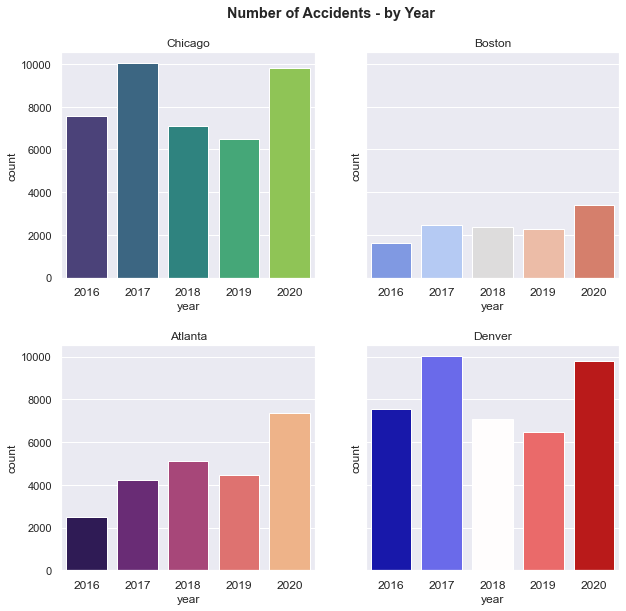

In [21]:
fig, axs = plt.subplots(figsize = (10, 8),
                        nrows = 2,
                        ncols = 2,
                        sharey = True)

plt.subplots_adjust(left  = 0.125, right = 0.9,
                    bottom = .001, top = 0.9,
                    wspace = 0.2, hspace = 0.3)

for ax in axs.flat:
    ax.set(xlabel = 'Year', ylabel = 'Frequency')
    ax.tick_params(axis = 'x', labelsize = 12)

make_countplot(chi_df, x = 'year', palette = 'viridis', ax = axs[0, 0]).set(title = 'Chicago')
make_countplot(bos_df, x = 'year', palette = 'coolwarm', ax = axs[0, 1]).set(title = 'Boston')
make_countplot(atl_df, x = 'year', palette = 'magma', ax = axs[1, 0]).set(title = 'Atlanta')
make_countplot(dia_df, x = 'year', palette = 'seismic', ax = axs[1, 1]).set(title = 'Denver')

plt.suptitle('Number of Accidents - by Year', fontweight = 'bold');

In [22]:
#function to generate hued count plots
def make_countplot(dataframe,
                   x = None,
                   hue = None,
                   palette = None,
                   ax = None):
    
    return sns.countplot(data = dataframe,
                         x = x,
                         hue = hue,
                         palette = palette,
                         ax = ax)

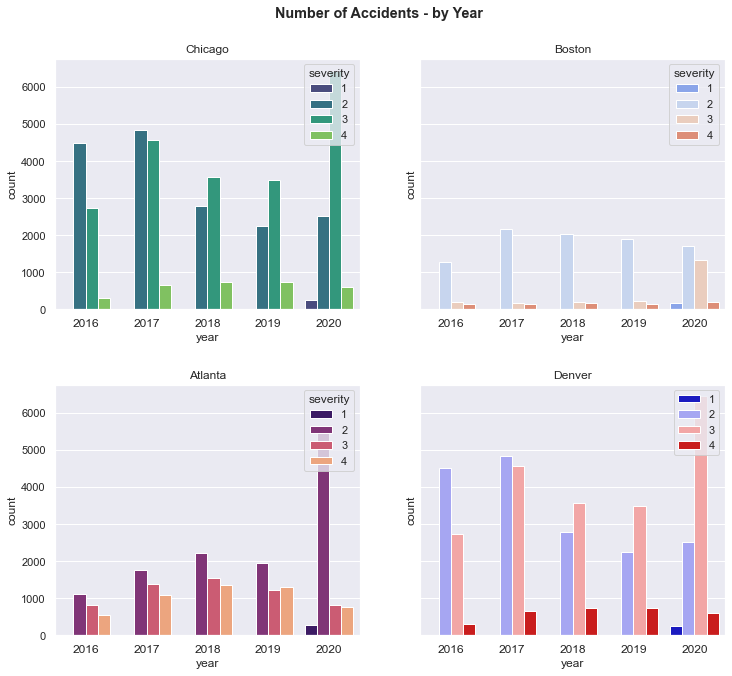

In [23]:
fig, axs = plt.subplots(figsize = (12, 9),
                        nrows = 2,
                        ncols = 2,
                        sharey = True)

plt.subplots_adjust(left  = 0.125, right = 0.9,
                    bottom = .01, top = 0.9,
                    wspace = 0.2, hspace = 0.3)

for ax in axs.flat:
    ax.set(xlabel = 'Year', ylabel = 'Frequency')
    ax.tick_params(axis = 'x', labelsize = 12)

make_countplot(chi_df, x = 'year', hue = 'severity', palette = 'viridis', ax = axs[0, 0]).set(title = 'Chicago')
make_countplot(bos_df, x = 'year', hue = 'severity', palette = 'coolwarm', ax = axs[0, 1]).set(title = 'Boston')
make_countplot(atl_df, x = 'year', hue = 'severity', palette = 'magma', ax = axs[1, 0]).set(title = 'Atlanta')
make_countplot(dia_df, x = 'year', hue = 'severity', palette = 'seismic', ax = axs[1, 1]).set(title = 'Denver')

plt.suptitle('Number of Accidents - by Year', fontweight = 'bold')
plt.legend(loc = 'best');
#Do all cities unreport accidents of 'severity' 1? There are so few ...

In [24]:
#function to generate histplots
def make_histplot(dataframe, 
                  x, y = None,
                  hue = None,
                  color = None,
                  palette = None,
                  kde = True, 
                  ax = None):
    
    return sns.histplot(data = dataframe, 
                        x = x, y = y, 
                        hue = hue,
                        color = color,
                        palette = palette,
                        kde = kde,
                        ax = ax)

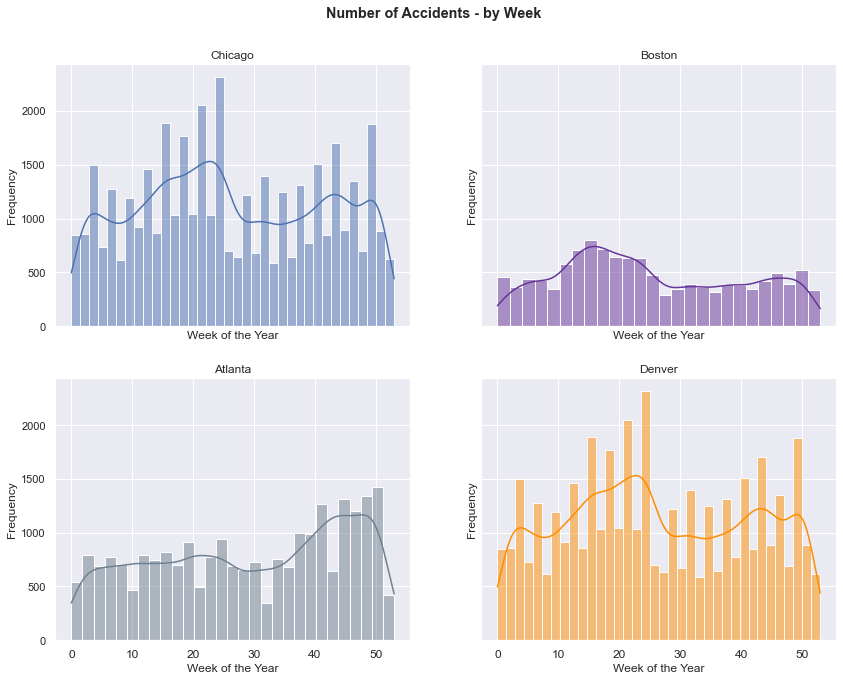

In [25]:
#plotting accidents by week
fig, axs = plt.subplots(figsize = (14, 10),
                        nrows = 2,
                        ncols = 2,
                        sharex = True,
                        sharey = True)

plt.subplots_adjust(left  = 0.125, right = 0.9,
                    bottom = 0.1, top = 0.9,
                    wspace = 0.2, hspace = 0.2)

for ax in axs.flat:
    ax.set(xlabel = 'Week of the Year', ylabel = 'Frequency')
    ax.tick_params(axis = 'x', labelsize = 12)
    
make_histplot(chi_df, x = 'week', ax = axs[0, 0]).set(title = 'Chicago')
make_histplot(bos_df, x = 'week', color = 'rebeccapurple', ax = axs[0, 1]).set(title = 'Boston')
make_histplot(atl_df, x = 'week', color = 'slategrey', ax = axs[1, 0]).set(title = 'Atlanta')
make_histplot(dia_df, x = 'week', color = 'darkorange', ax = axs[1, 1]).set(title = 'Denver')

plt.suptitle('Number of Accidents - by Week', fontweight = 'bold');

In [29]:
#https://github.com/mwaskom/seaborn/issues/2280
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

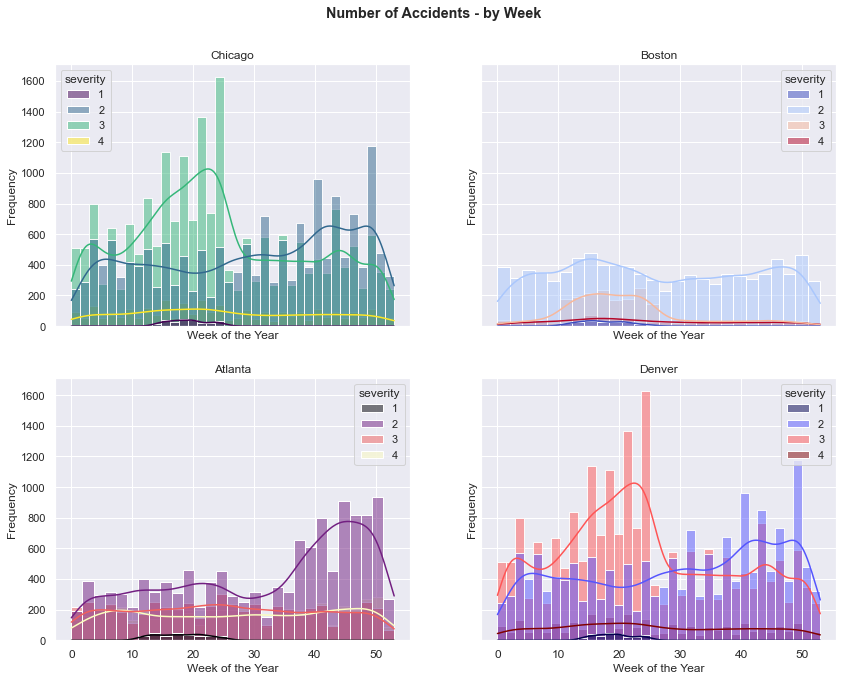

In [30]:
#plot for accidents by week, hued by severity
fig, axs = plt.subplots(figsize = (14, 10),
                        nrows = 2,
                        ncols = 2,
                        sharex = True,
                        sharey = True)

plt.subplots_adjust(left  = 0.125, right = 0.9,
                    bottom = 0.1, top = 0.9,
                    wspace = 0.2, hspace = 0.2)

for ax in axs.flat:
    ax.set(xlabel = 'Week of the Year', ylabel = 'Frequency')
    ax.tick_params(axis = 'x', labelsize = 12)
    
make_histplot(chi_df, x = 'week', hue = 'severity', palette = 'viridis', ax = axs[0, 0]).set(title = 'Chicago')
make_histplot(bos_df, x = 'week', hue = 'severity', palette = 'coolwarm', ax = axs[0, 1]).set(title = 'Boston')
make_histplot(atl_df, x = 'week', hue = 'severity', palette = 'magma', ax = axs[1, 0]).set(title = 'Atlanta')
make_histplot(dia_df, x = 'week', hue = 'severity', palette = 'seismic', ax = axs[1, 1]).set(title = 'Denver')

plt.suptitle('Number of Accidents - by Week', fontweight = 'bold')
move_legend(ax, 'upper right');
#the legend for Chicago still won't move, hmm ...

In [31]:
#function to generate kdeplots
def make_kdeplot(dataframe,
                 shade = True,
                 color = None,
                 clip = None,
                 ax = None):
    
    return sns.kdeplot(data = dataframe,
                shade = shade,
                color = color, 
                clip = clip, 
                ax = ax);

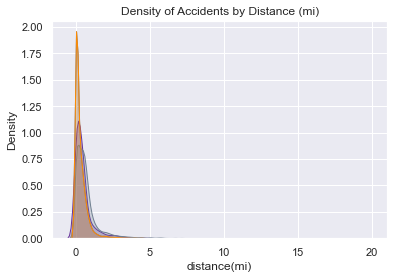

In [32]:
#https://stackoverflow.com/questions/32899463/how-can-i-overlay-two-graphs-in-seaborn
#https://stackoverflow.com/questions/45911709/limit-the-range-of-x-in-seaborn-distplot-kde-estimation

fig, ax = plt.subplots()

make_kdeplot(chi_df['distance(mi)'], clip = (-10, 20), ax = ax)
make_kdeplot(bos_df['distance(mi)'], clip = (-10, 20), color = 'rebeccapurple', ax = ax)
make_kdeplot(atl_df['distance(mi)'], clip = (-10, 20), color = 'slategrey', ax = ax)
make_kdeplot(dia_df['distance(mi)'], clip = (-10, 20), color = 'darkorange', ax = ax)

plt.title('Density of Accidents by Distance (mi)');

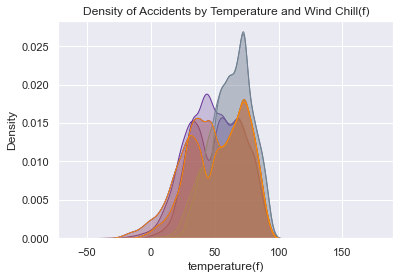

In [33]:
#https://www.python-graph-gallery.com/74-density-plot-of-several-variables

#Looking at temperature variables for all cities
fig = make_kdeplot(chi_df['temperature(f)'], color = 'blue', shade = True)
fig = make_kdeplot(chi_df['wind_chill(f)'], color = 'blue', shade = True)

fig = make_kdeplot(bos_df['temperature(f)'], color = 'rebeccapurple', shade = True)
fig = make_kdeplot(bos_df['wind_chill(f)'], color = 'rebeccapurple', shade = True)

fig = make_kdeplot(atl_df['temperature(f)'], color = 'slategrey', shade = True)
fig = make_kdeplot(atl_df['wind_chill(f)'], color = 'slategrey', shade = True)

fig = make_kdeplot(dia_df['temperature(f)'], color = 'darkorange', shade = True)
fig = make_kdeplot(dia_df['wind_chill(f)'], color = 'darkorange', shade = True)

plt.title('Density of Accidents by Temperature and Wind Chill(f)')
plt.show();

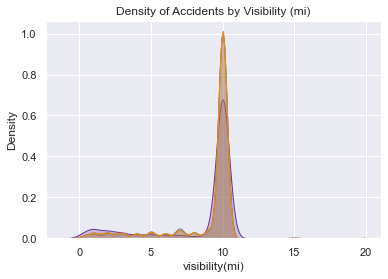

In [34]:
#kde plot for all cities' visbility distance
fig, ax = plt.subplots()

make_kdeplot(chi_df['visibility(mi)'], clip = (-10, 20), ax = ax)
make_kdeplot(bos_df['visibility(mi)'], clip = (-10, 20), color = 'rebeccapurple', ax = ax)
make_kdeplot(atl_df['visibility(mi)'], clip = (-10, 20), color = 'slategrey', ax = ax)
make_kdeplot(dia_df['visibility(mi)'], clip = (-10, 20), color = 'darkorange', ax = ax)

plt.title('Density of Accidents by Visibility (mi)');

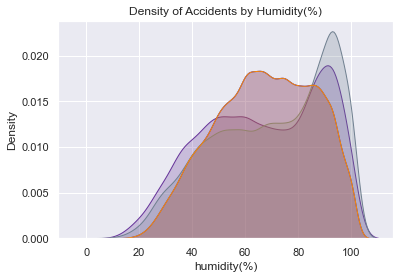

In [35]:
#Looking at weather variables for all cities
fig = make_kdeplot(chi_df['humidity(%)'], color = 'blue', clip = (-10, 120), shade = True)
fig = make_kdeplot(bos_df['humidity(%)'], color = 'rebeccapurple', clip = (-10, 120), shade = True)
fig = make_kdeplot(atl_df['humidity(%)'], color = 'slategrey', clip = (-10, 120), shade = True)
fig = make_kdeplot(dia_df['humidity(%)'], color = 'darkorange', clip = (-10, 120), shade = True)

plt.title('Density of Accidents by Humidity(%)')
plt.show();

In [2]:
#Looking at weather variables for all cities

fig = make_kdeplot(chi_df['wind_speed(mph)'], color = 'blue', clip = (-10, 40), shade = True)
fig = make_kdeplot(bos_df['wind_speed(mph)'], color = 'rebeccapurple', clip = (-10, 40), shade = True)
fig = make_kdeplot(atl_df['wind_speed(mph)'], color = 'slategrey', clip = (-10, 40), shade = True)
fig = make_kdeplot(dia_df['wind_speed(mph)'], color = 'darkorange', clip = (-10, 40), shade = True)

plt.title('Density of Accidents by Wind Speed(mph)')
plt.show();

NameError: name 'make_kdeplot' is not defined

**Trying to Plot the 'Shape' of the Cities**

In [113]:
#https://matplotlib.org/3.3.0/gallery/text_labels_and_annotations/titles_demo.html

#function to generate jointplots
def make_jointplot(x, y,
                   kind = 'kde',
                   fill = True, 
                   color = None, 
                   ax = None):
    
    return sns.jointplot(x = x, y = y,
                         kind = kind,
                         fill = fill,
                         color = color, 
                         ax = ax)

In [116]:
#A proof of concept from a member of the matplotlib development team as
#Seaborn has a built-in issue where certain types of plots don't like subplots

#https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

In [118]:
import SeabornFig2Grid as sfg

ModuleNotFoundError: No module named 'SeabornFig2Grid'

NameError: name 'sfg' is not defined

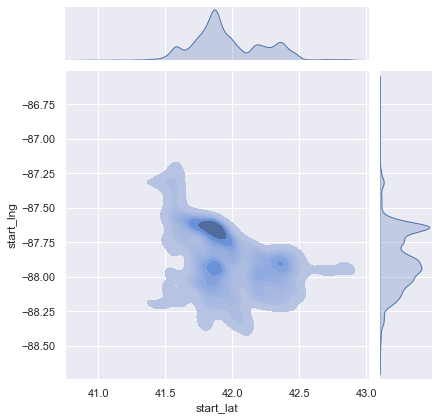

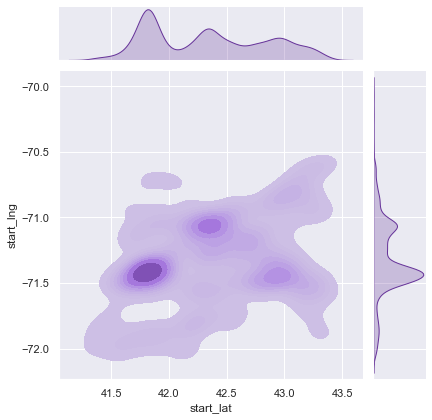

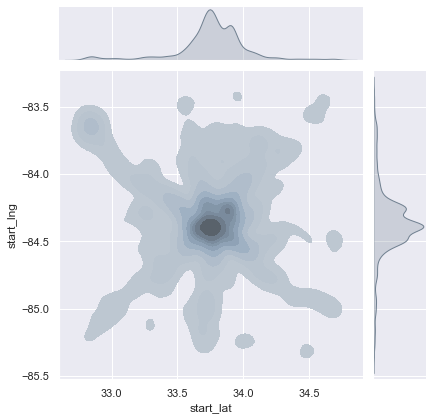

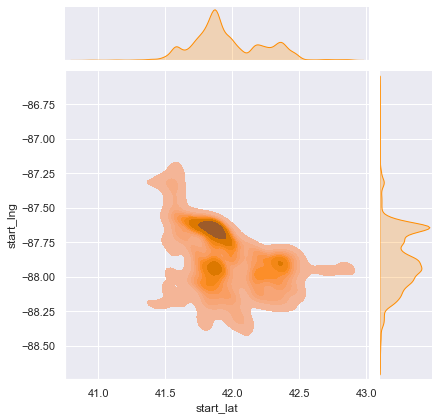

<Figure size 1152x1152 with 0 Axes>

In [117]:
g0 = make_jointplot(x = chi_df["start_lat"], y = chi_df["start_lng"], kind = 'kde', fill = True)
g1 = make_jointplot(x = bos_df["start_lat"], y = bos_df["start_lng"], kind = 'kde', fill = True, color = 'rebeccapurple')
g2 = make_jointplot(x = atl_df["start_lat"], y = atl_df["start_lng"], kind = 'kde', fill = True, color = 'slategrey')
g3 = make_jointplot(x = dia_df["start_lat"], y = dia_df["start_lng"], kind = 'kde', fill = True, color = 'darkorange')


fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(2, 2)

mg0 = sfg.SeabornFig2Grid(g0, fig, gs[0])
mg1 = sfg.SeabornFig2Grid(g1, fig, gs[1])
mg2 = sfg.SeabornFig2Grid(g2, fig, gs[3])
mg3 = sfg.SeabornFig2Grid(g3, fig, gs[2])

gs.tight_layout(fig)
#gs.update(top=0.7)

plt.show();

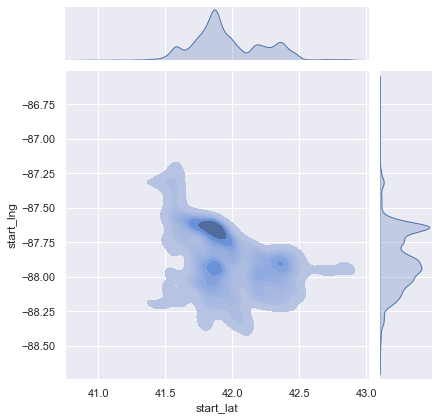

In [110]:
#NEED TO DELETE FOR EXAMPLE ONLY
#NEED TO DELETE FOR EXAMPLE ONLY
#NEED TO DELETE FOR EXAMPLE ONLY

#Density of Chicago's accidents
#make_jointplot(x = chi_df["start_lat"], y = chi_df["start_lng"], kind = 'kde', fill = True)
#plt.yticks(rotation = 90);

In [106]:
#function to generate jointplots - hex kind
def make_jointplothex(x, y,
                   kind = 'hex',
                   color = None):
    
    return sns.jointplot(x = x, y = y,
                         kind = kind,
                         color = color)

In [119]:
#IF I FIX THE ABOVE ISSUE I WILL REPEAT THE JOINTPOINT SUBPLOTS FOR JOINTPLOTS HEX TYPE
#IF I FIX THE ABOVE ISSUE I WILL REPEAT THE JOINTPOINT SUBPLOTS FOR JOINTPLOTS HEX TYPE
#IF I FIX THE ABOVE ISSUE I WILL REPEAT THE JOINTPOINT SUBPLOTS FOR JOINTPLOTS HEX TYPE

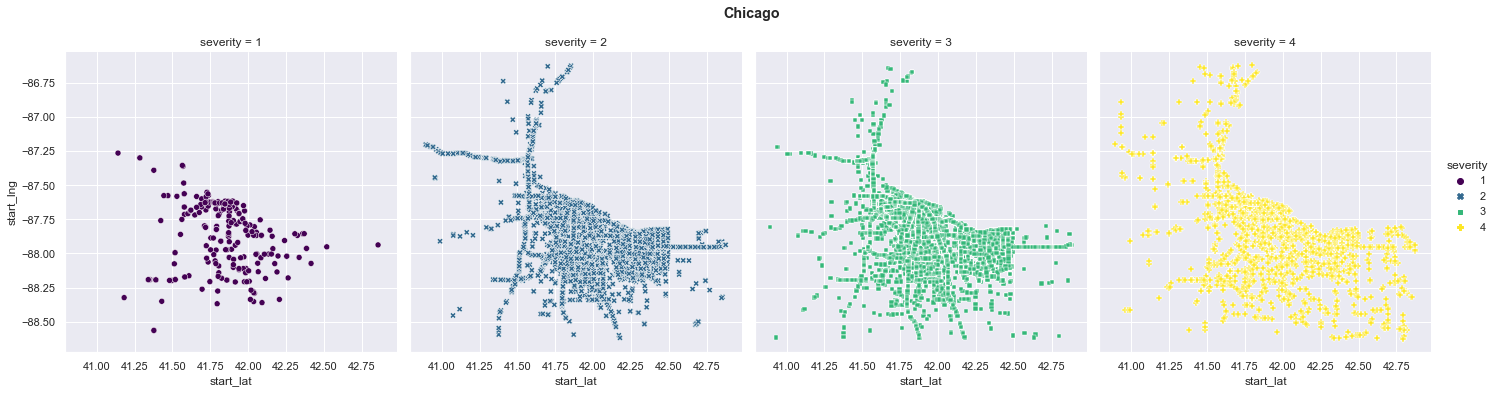

In [155]:
sns.relplot(
    data = chi_df, x = "start_lat", y = "start_lng",
    col = "severity", hue = "severity", style = "severity",
    kind = "scatter", palette = 'viridis')
plt.suptitle('Chicago', y = 1.05, fontweight = 'bold');

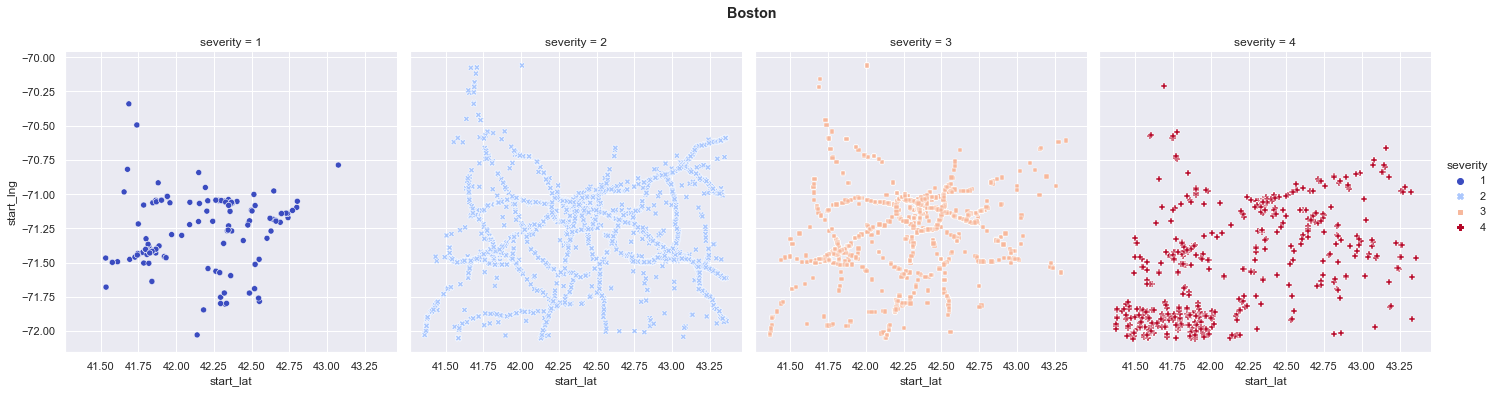

In [157]:
sns.relplot(
    data = bos_df, x = "start_lat", y = "start_lng",
    col = "severity", hue = "severity", style = "severity",
    kind = "scatter", palette = 'coolwarm')
plt.suptitle('Boston', y = 1.05, fontweight = 'bold');

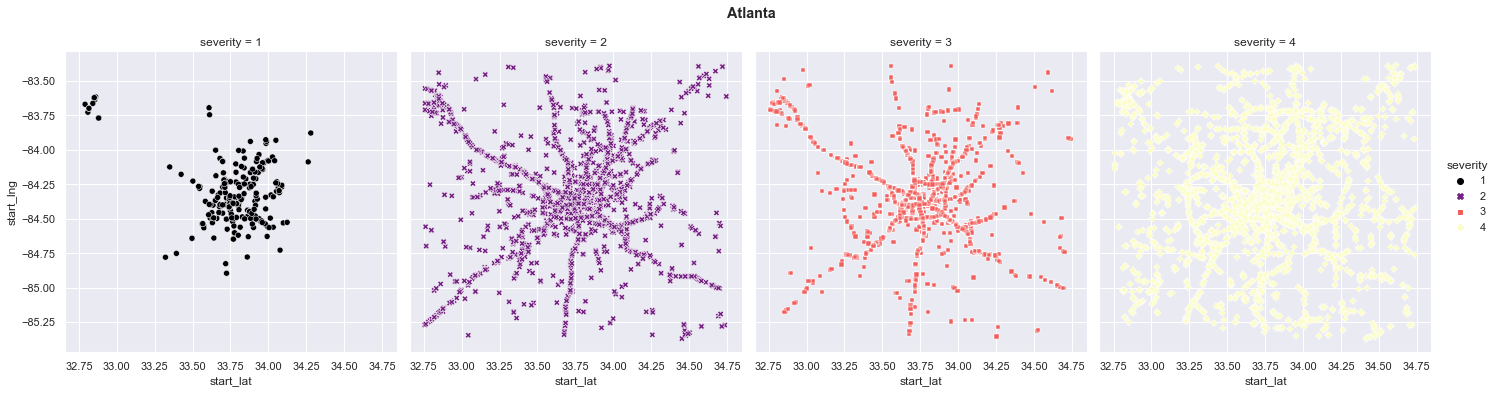

In [158]:
sns.relplot(
    data = atl_df, x = "start_lat", y = "start_lng",
    col = "severity", hue = "severity", style = "severity",
    kind = "scatter", palette = 'magma')
plt.suptitle('Atlanta', y = 1.05, fontweight = 'bold');

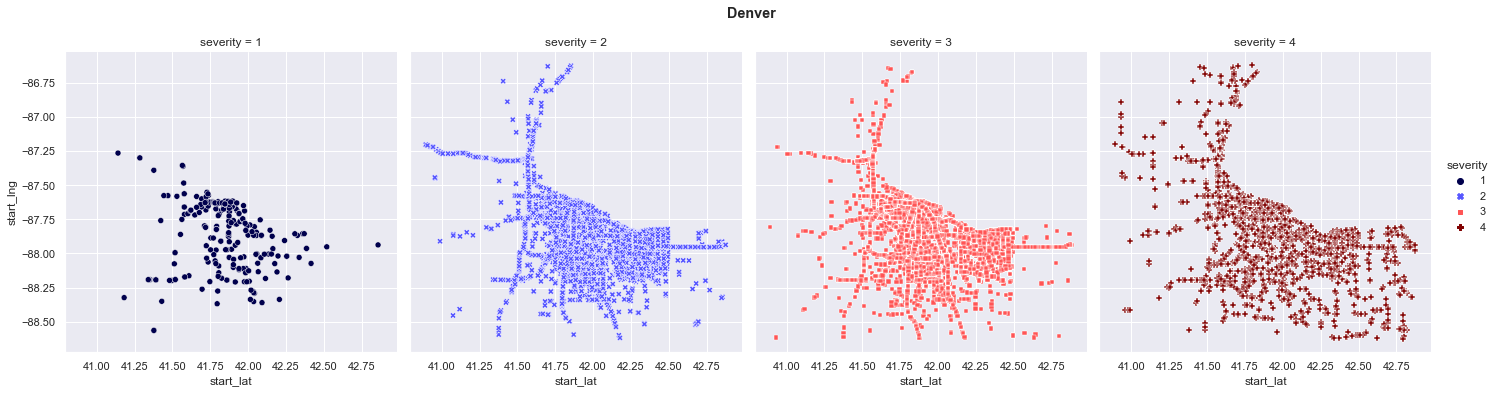

In [169]:
sns.relplot(
    data = dia_df, x = "start_lat", y = "start_lng",
    col = "severity", hue = "severity", style = "severity",
    kind = "scatter", palette = 'seismic')
plt.suptitle('Denver', y = 1.05, fontweight = 'bold');

In [29]:
#function to generate scatterplots
def make_scatterplot(x, y, s, alpha):
    #setting figure size
    plt.figure(figsize=(8, 8))
    
    #setting x and y labels
    plt.xlabel('Starting Latitude')
    plt.ylabel('Starting Longitude')
    
    #making plot
    return plt.scatter(x = x,
                       y = y,
                       s = s,
                       alpha = 0.5)

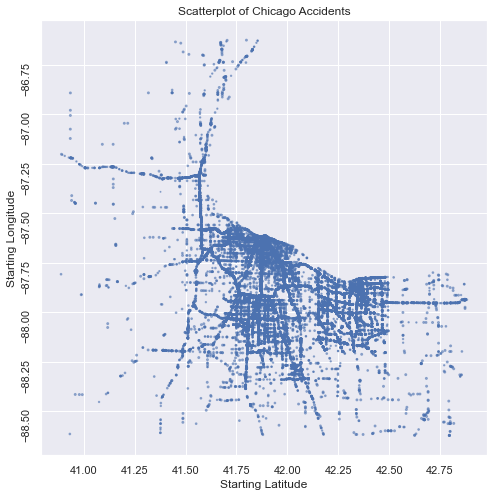

In [30]:
#scatterplot of Chicago
make_scatterplot(x = chi_df['start_lat'],
                 y = chi_df['start_lng'],
                 s = chi_df['severity'],
                 alpha = 0.5)
plt.title('Scatterplot of Chicago Accidents')
plt.yticks(rotation = 90);

In [125]:
#function to generate hued scatterplots
def make_hued_scatterplot(x, y, c, s, cmap, alpha):
    #setting figure size:
    plt.figure(figsize=(8, 8))
    
    #setting x and y labels:
    plt.xlabel('Starting Latitude')
    plt.ylabel('Starting Longitude')
    
    #making plot:
    scatter = plt.scatter(x = x,
                          y = y,
                          c = c,
                          s = s,
                          cmap = cmap,
                          alpha = 0.5)
    
    #setting legend:
    plt.legend(handles = scatter.legend_elements()[0], labels = [1, 2, 3, 4])
    
    #making plot
    return scatter

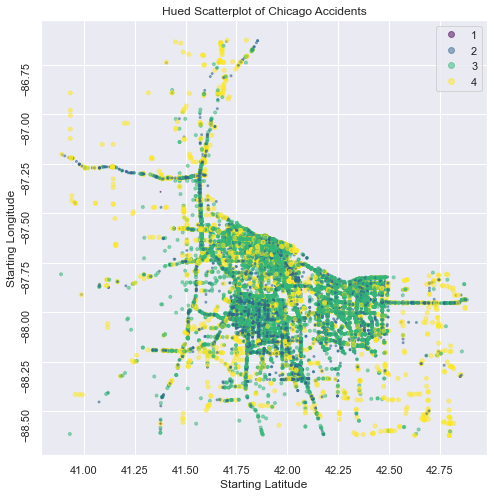

In [126]:
make_hued_scatterplot(x = chi_df['start_lat'],
                      y = chi_df['start_lng'],
                      c = chi_df['severity'],
                      s = chi_df['severity'] ** 2,
                      cmap = 'viridis',
                      alpha = 0.5)
plt.title('Hued Scatterplot of Chicago Accidents')
plt.yticks(rotation = 90);

**Exploring Time Intervals**

- For Frame of Reference

| Human-readable Time |      Seconds      |
|----------|:-------------:|
| 1 hour | 3600 seconds |
| 1 day | 86400 seconds |
| 1 week | 604800 seconds |
| 1 month (30.44 days) | 2629743 seconds |
| 1 hour (365.24 days) | 31556926 seconds |

source: https://www.epochconverter.com/

In [14]:
def back_from_the_epoch(dataframe):
    dataframe_time = pd.to_datetime(dataframe['start_time_ep'], unit = 's')
    dataframe_time = pd.DataFrame(dataframe_time)
    dataframe_time = dataframe_time.rename(columns = {'start_time_ep': 'start_time'})
    dataframe_time = dataframe_time.sort_values('start_time')
    
    return dataframe_time

In [18]:
chi_df_time = back_from_the_epoch(chi_df)
bos_df_time = back_from_the_epoch(bos_df)
atl_df_time = back_from_the_epoch(atl_df)
dia_df_time = back_from_the_epoch(dia_df)

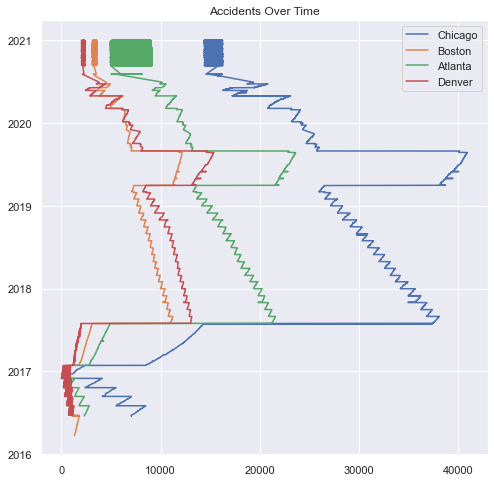

In [27]:
#https://www.python-graph-gallery.com/242-area-chart-and-faceting
plt.figure(figsize = (8, 8))

plt.plot(chi_df_time)
plt.plot(bos_df_time)
plt.plot(atl_df_time)
plt.plot(dia_df_time)

plt.title("Accidents Over Time")
plt.legend(labels = ['Chicago', 'Boston', 'Atlanta', 'Denver']);

In [56]:
#trying to pinpoint the 'average' accident severity and location:
mean_accident_loc = chi_df[['severity', 'start_lat', 'start_lng', 'end_lat', 'end_lng']].mean()
loc_dict = dict(mean_accident_loc)
loc_dict

{'severity': 2.6491592024015813,
 'start_lat': 41.95991812605946,
 'start_lng': -87.86151753938047,
 'end_lat': 41.95997005410754,
 'end_lng': -87.86134766500015}

**Looking At Individual Years, Months, and Days of DST**

In [58]:
chi_2016 = chi_df.loc[chi_df['year'] == 2016]
chi_2017 = chi_df.loc[chi_df['year'] == 2017]
chi_2018 = chi_df.loc[chi_df['year'] == 2018]
chi_2019 = chi_df.loc[chi_df['year'] == 2019]
chi_2020 = chi_df.loc[chi_df['year'] == 2020]

In [59]:
print(chi_2016.shape[0])
print(chi_2017.shape[0])
print(chi_2018.shape[0])
print(chi_2019.shape[0])
print(chi_2020.shape[0])

7551
10036
7088
6483
9815


In [60]:
chi_2016.head(3)

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,start_time_ep,end_time_ep,weather_timestamp_ep,year,month,week,accident_duration,side_L,side_R,wind_direction_CALM,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_VAR,wind_direction_W,wind_direction_WNW,wind_direction_WSW,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Heavy Rain,weather_condition_Heavy Snow,weather_condition_Light Drizzle,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Snow,weather_condition_Thunder,weather_condition_Thunderstorms and Rain,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_condition_Light Snow and Sleet,is_DST
0,2,42.305960,-87.960150,42.306916,-87.960918,0.077,37.0,31.0,79.0,29.59,10.0,8.1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.480517e+09,1.480539e+09,1.480518e+09,2016,11,48,21600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,42.175870,-88.135770,42.174620,-88.135794,0.086,37.0,28.1,76.0,29.62,10.0,15.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.480518e+09,1.480540e+09,1.480518e+09,2016,11,48,21600.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,42.175897,-88.135769,42.174612,-88.135794,0.089,37.0,28.1,76.0,29.62,10.0,15.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.480519e+09,1.480541e+09,1.480518e+09,2016,11,48,22524.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


''

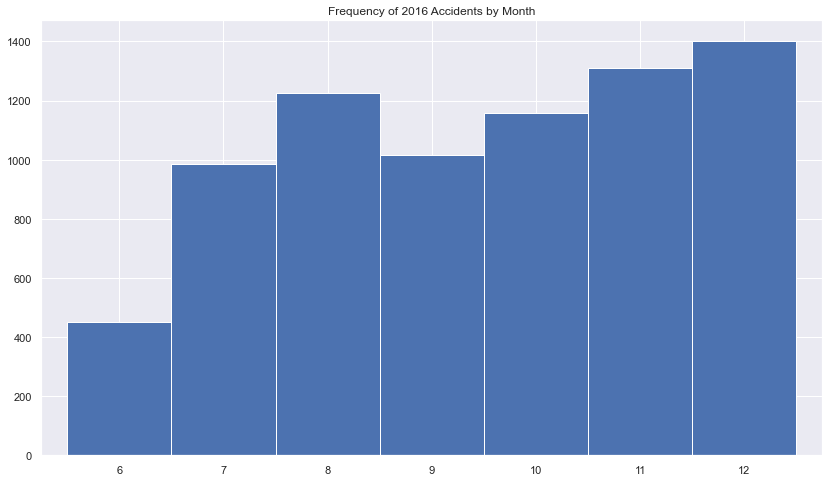

In [61]:
#bar plot of 2016 accident frequencies
chi_2016['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize = (14, 8),
                                                   width = 1,
                                                   title = 'Frequency of 2016 Accidents by Month',
                                                   rot = 0) #CH added to flip x labels to make them more readable 
;

In [62]:
chi_2017.head(3)

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,start_time_ep,end_time_ep,weather_timestamp_ep,year,month,week,accident_duration,side_L,side_R,wind_direction_CALM,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_VAR,wind_direction_W,wind_direction_WNW,wind_direction_WSW,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Heavy Rain,weather_condition_Heavy Snow,weather_condition_Light Drizzle,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Snow,weather_condition_Thunder,weather_condition_Thunderstorms and Rain,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_condition_Light Snow and Sleet,is_DST
1413,3,41.871010,-87.76894,41.874150,-87.80818,2.030,25.0,19.3,78.0,30.07,10.0,4.6,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.483238e+09,1.483259e+09,1.483239e+09,2017,1,1,21600.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1414,3,41.753837,-87.94486,41.753401,-87.94485,0.030,39.0,32.8,89.0,29.96,1.5,9.2,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.483374e+09,1.483396e+09,1.483374e+09,2017,1,1,21600.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1415,3,41.753345,-87.94458,41.753832,-87.94459,0.034,39.0,32.8,89.0,29.96,1.5,9.2,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.483374e+09,1.483396e+09,1.483374e+09,2017,1,1,21600.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


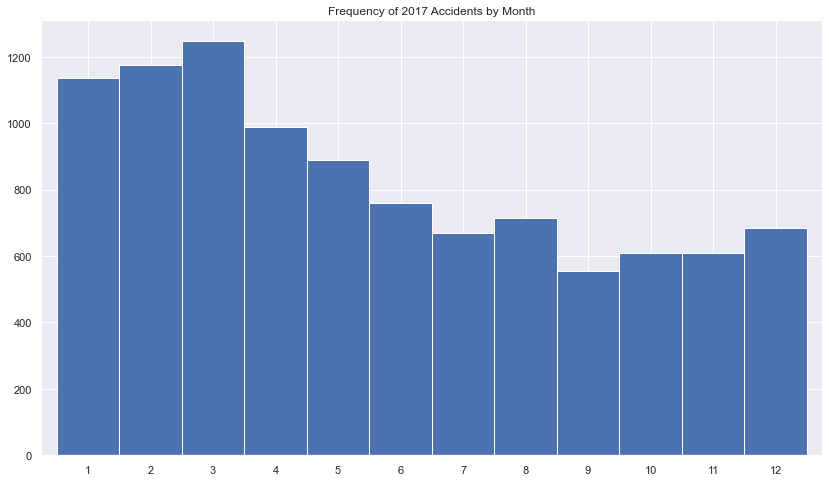

In [63]:
#bar plot of 2017 accident frequencies
chi_2017['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize = (14, 8),
                                                   width = 1,
                                                   title = 'Frequency of 2017 Accidents by Month',
                                                   rot = 0);

In [64]:
chi_2018.head(3)

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,start_time_ep,end_time_ep,weather_timestamp_ep,year,month,week,accident_duration,side_L,side_R,wind_direction_CALM,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_VAR,wind_direction_W,wind_direction_WNW,wind_direction_WSW,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Heavy Rain,weather_condition_Heavy Snow,weather_condition_Light Drizzle,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Snow,weather_condition_Thunder,weather_condition_Thunderstorms and Rain,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_condition_Light Snow and Sleet,is_DST
27875,3,41.57114,-87.43828,41.56983,-87.41798,1.053,41.0,39.0,81.0,30.05,4.0,3.5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.543594e+09,1.543596e+09,1.543593e+09,2018,11,47,1784.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
27876,2,41.93763,-88.03780,41.92605,-88.03793,0.800,28.9,22.8,85.0,29.97,6.0,5.8,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.0,1.543557e+09,1.543558e+09,1.543557e+09,2018,11,47,1773.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27877,2,41.94658,-87.71148,41.94658,-87.71148,0.000,28.9,25.2,82.0,30.01,7.0,3.5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.543563e+09,1.543565e+09,1.543564e+09,2018,11,47,1761.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


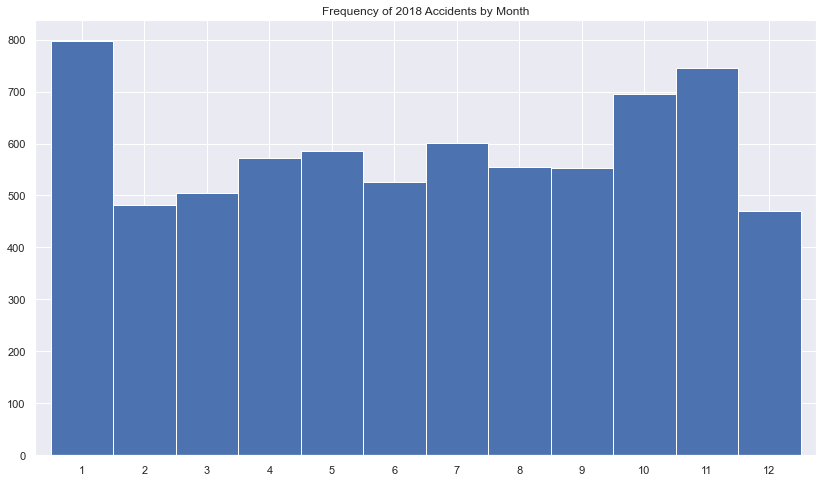

In [65]:
#bar plot of 2018 accident frequencies
chi_2018['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize = (14, 8),
                                                   width = 1,
                                                   title = 'Frequency of 2018 Accidents by Month',
                                                   rot = 0);

In [66]:
chi_2019.head(3)

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,start_time_ep,end_time_ep,weather_timestamp_ep,year,month,week,accident_duration,side_L,side_R,wind_direction_CALM,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_VAR,wind_direction_W,wind_direction_WNW,wind_direction_WSW,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Heavy Rain,weather_condition_Heavy Snow,weather_condition_Light Drizzle,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Snow,weather_condition_Thunder,weather_condition_Thunderstorms and Rain,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_condition_Light Snow and Sleet,is_DST
24110,3,41.87248,-87.64574,41.87036,-87.64508,0.150,27.0,19.0,81.0,29.15,10.0,8.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.577837e+09,1.577838e+09,1.577836e+09,2019,12,52,1726.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
24111,3,41.87561,-87.64155,41.87571,-87.64355,0.103,27.0,19.0,81.0,29.15,10.0,8.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.577837e+09,1.577838e+09,1.577836e+09,2019,12,52,1726.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
24112,3,41.90150,-87.92034,41.90963,-87.93019,0.756,25.0,16.0,85.0,29.08,10.0,8.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.577837e+09,1.577838e+09,1.577836e+09,2019,12,52,1726.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


''

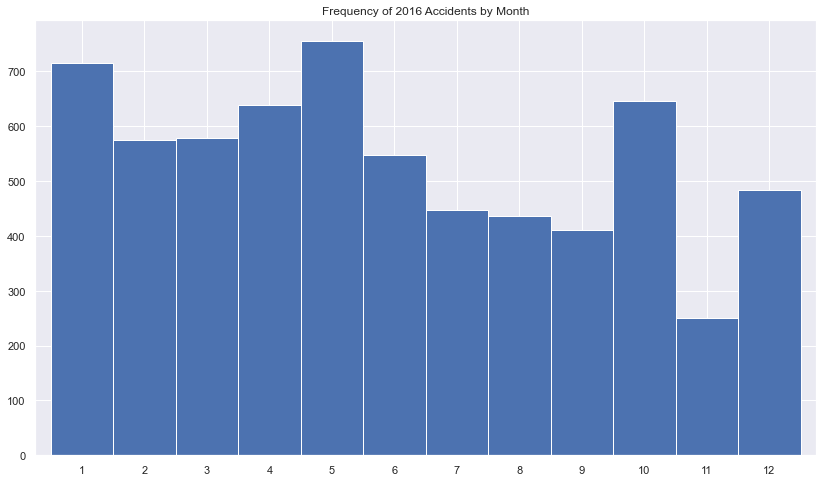

In [67]:
#bar plot of 2019 accident frequencies
chi_2019['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize = (14, 8),
                                                   width = 1,
                                                   title = 'Frequency of 2016 Accidents by Month',
                                                   rot = 0)
;

In [68]:
chi_2020.head(3)

,severity,start_lat,start_lng,end_lat,end_lng,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,start_time_ep,end_time_ep,weather_timestamp_ep,year,month,week,accident_duration,side_L,side_R,wind_direction_CALM,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_VAR,wind_direction_W,wind_direction_WNW,wind_direction_WSW,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Heavy Rain,weather_condition_Heavy Snow,weather_condition_Light Drizzle,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Rain,weather_condition_Snow,weather_condition_Thunder,weather_condition_Thunderstorms and Rain,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_00,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_condition_Light Snow and Sleet,is_DST
14392,2,42.207312,-87.811845,42.208289,-87.812422,0.074,40.0,34.0,41.0,29.57,10.0,8.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.606935e+09,1.606941e+09,1.606935e+09,2020,12,48,6032.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14393,2,42.363555,-87.929838,42.363601,-87.929777,0.004,31.0,24.0,69.0,29.08,10.0,7.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.609338e+09,1.609344e+09,1.609336e+09,2020,12,52,6006.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14394,2,42.170064,-88.020662,42.170132,-88.018971,0.087,32.0,27.0,59.0,29.48,10.0,5.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.606963e+09,1.606969e+09,1.606964e+09,2020,12,48,6250.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


''

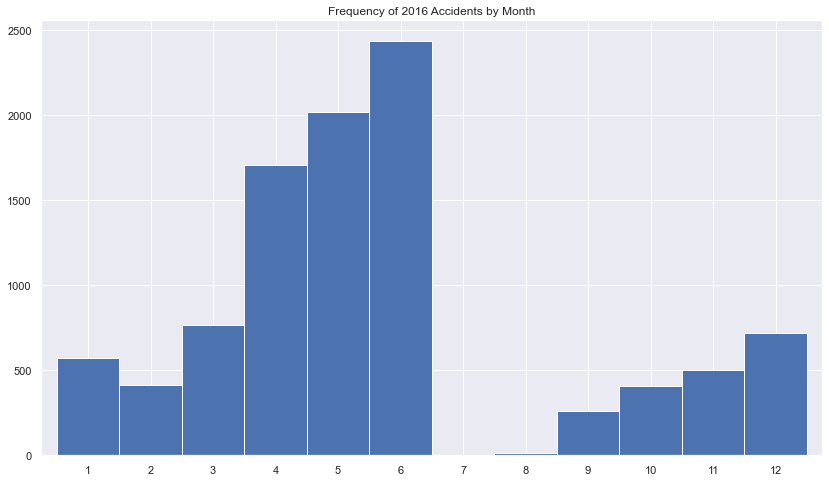

In [69]:
#bar plot of 2020 accident frequencies
chi_2020['month'].value_counts().sort_index().plot(kind = 'bar',
                                                   figsize = (14, 8),
                                                   width = 1,
                                                   title = 'Frequency of 2016 Accidents by Month',
                                                   rot = 0)
;

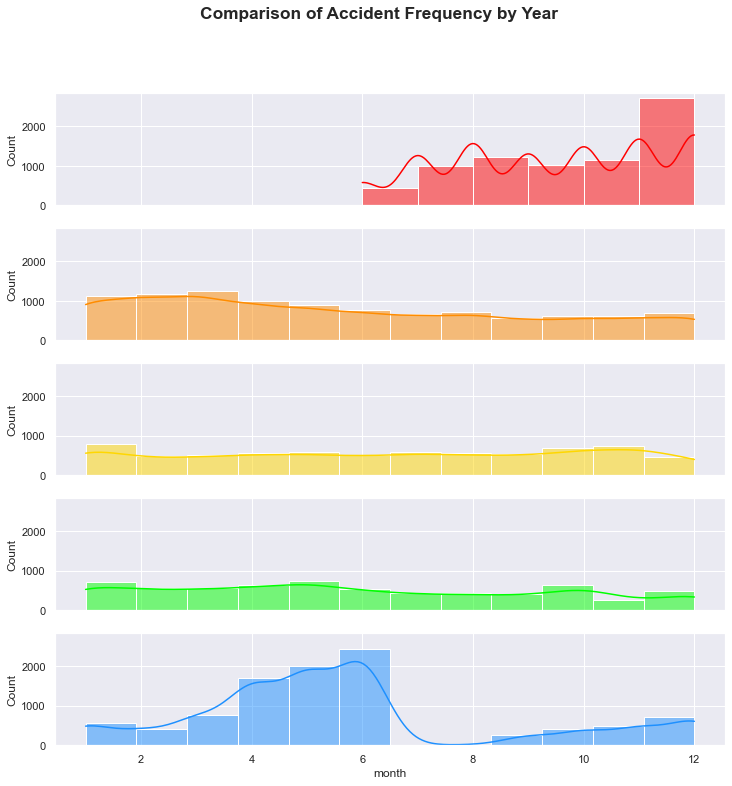

In [70]:
#setting up subplots and figsize:
fig, axs = plt.subplots(5, 1, sharex = True, sharey = True, figsize = (12, 12))

#setting title for 'overall' plot
fig.suptitle('Comparison of Accident Frequency by Year',
               fontsize = 'x-large', 
               fontweight = 'bold' )

#individual subplots:
sns.histplot(data = chi_2016, x = "month",
             color = "red", bins = 6,
             kde = True, ax = axs[0])
sns.histplot(data = chi_2017, x = "month",
             color = "darkorange", bins = 12,
             kde = True, ax = axs[1])
sns.histplot(data = chi_2018, x = "month",
             color = "gold", bins = 12,
             kde = True, ax = axs[2])
sns.histplot(data = chi_2019, x = "month",
             color = "lime", bins = 12,
             kde = True, ax = axs[3])
sns.histplot(data = chi_2020, x = "month",
             color = "dodgerblue", bins = 12,
             kde = True, ax = axs[4])

#displaying plot:
plt.show()